In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-and-customer-data/sales_data.csv
/kaggle/input/sales-and-customer-data/customer_data.csv


In [2]:
#import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#load dataset
customer_df = pd.read_csv("/kaggle/input/sales-and-customer-data/customer_data.csv")

In [4]:
#load dataset
sales_df = pd.read_csv("/kaggle/input/sales-and-customer-data/sales_data.csv")

In [5]:
customer_df.head()

,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash


In [6]:
sales_df.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon


In [7]:
#check for duplicated values
customer_df.duplicated().values.any()


False

In [8]:
#check for duplicated values
sales_df.duplicated().values.any()

False

In [9]:
df = pd.merge(customer_df, sales_df, on='customer_id')
df.head()

,customer_id,gender,age,payment_method,invoice_no,category,quantity,price,invoice_date,shopping_mall
0,C241288,Female,28.0,Credit Card,I138884,Clothing,5,1500.40,05-08-2022,Kanyon
1,C111565,Male,21.0,Debit Card,I317333,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,C266599,Male,20.0,Cash,I127801,Clothing,1,300.08,09-11-2021,Metrocity
3,C988172,Female,66.0,Credit Card,I173702,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,C189076,Female,53.0,Cash,I337046,Books,4,60.60,24-10-2021,Kanyon


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
 4   invoice_no      99457 non-null  object 
 5   category        99457 non-null  object 
 6   quantity        99457 non-null  int64  
 7   price           99457 non-null  float64
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB


In [11]:
# Converting 'invoice_date' to datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d-%m-%Y')

#investigate by category and find best sold by quantity & price
best_sold = df.groupby('category')[[
    'quantity',
    'price'
]].sum()

best_sold.sort_values(
    by = 'quantity', 
    ascending = False
)

,quantity,price
category,,
Clothing,103558,31075684.64
Cosmetics,45465,1848606.90
Food & Beverage,44277,231568.71
Toys,30321,1086704.64
Shoes,30217,18135336.89
Technology,15021,15772050.00
Books,14982,226977.30
Souvenir,14871,174436.83


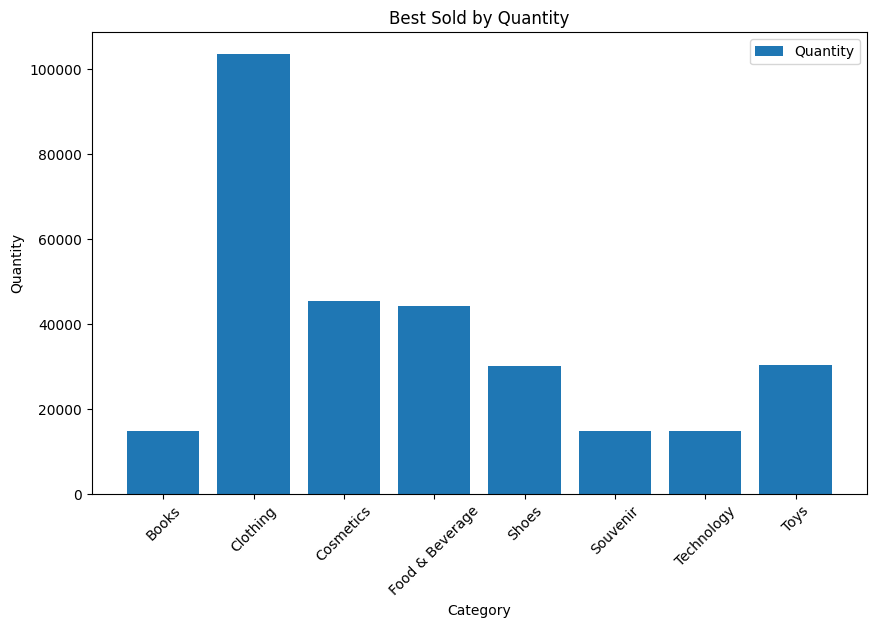

In [12]:
import matplotlib.pyplot as plt

# Data for plotting
categories = best_sold.index
quantity = best_sold['quantity']


# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(categories, quantity, label='Quantity')


# Setting labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Quantity')
ax.set_title('Best Sold by Quantity')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Adding legend
ax.legend()

# Displaying the plot
plt.show()


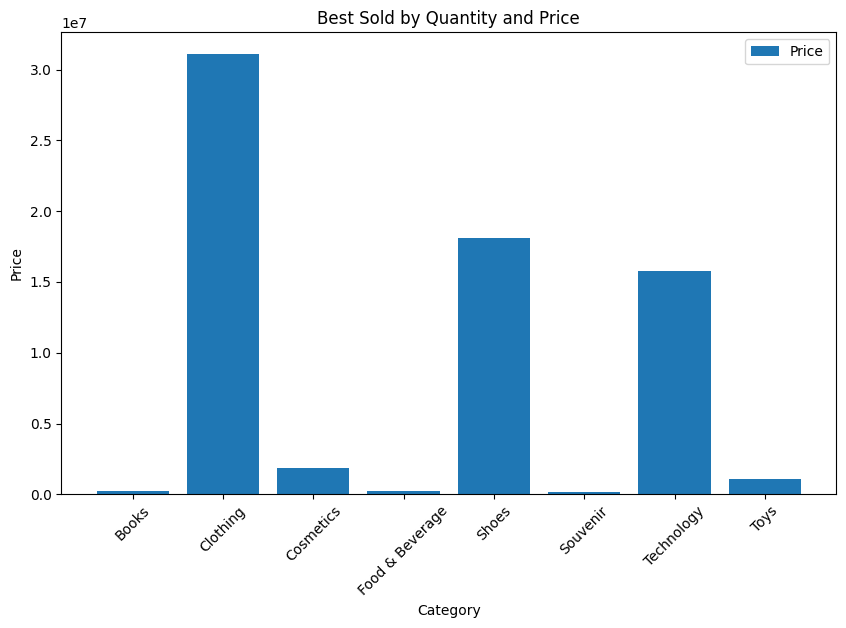

In [13]:
# Data for plotting
categories = best_sold.index
price = best_sold['price']

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(categories, price, label='Price')

# Setting labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Price')
ax.set_title('Best Sold by Quantity and Price')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Adding legend
ax.legend()

# Displaying the plot
plt.show()

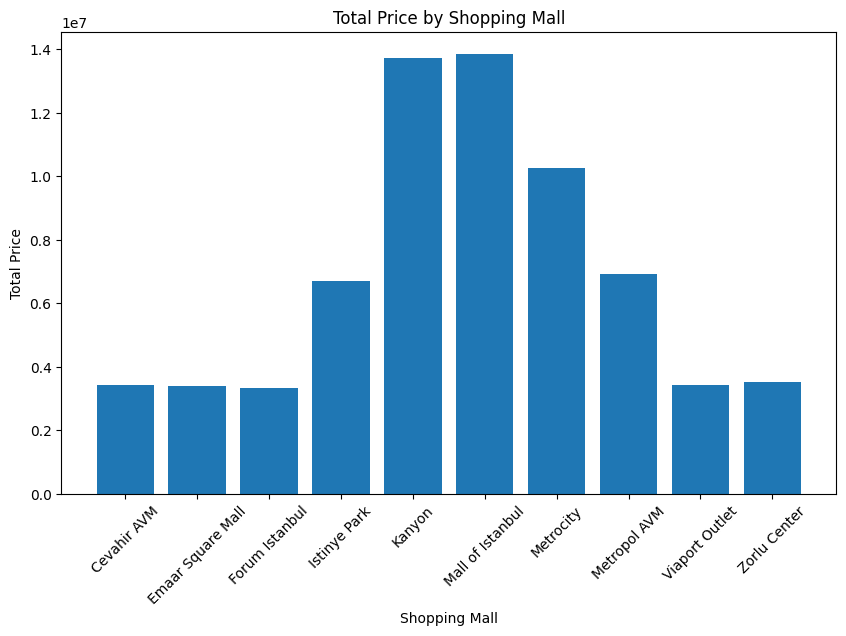

In [14]:
# Group according to shopping mall
grouped_mall = df.groupby('shopping_mall')['price'].sum()

# datafor graph
shopping_malls = grouped_mall.index
prices = grouped_mall.values

# draw
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(shopping_malls, prices)

# axis info
ax.set_xlabel('Shopping Mall')
ax.set_ylabel('Total Price')
ax.set_title('Total Price by Shopping Mall')

# rotation for better visuals
plt.xticks(rotation=45)

# show
plt.show()

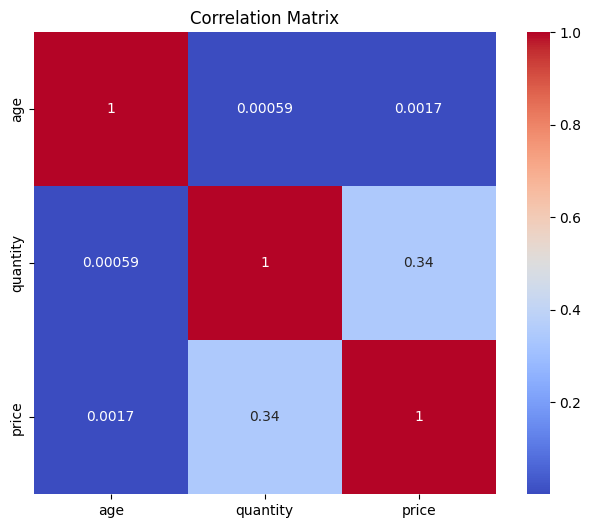

In [15]:
import seaborn as sns

# picking type of data
numeric_columns = ['age', 'quantity', 'price']

# Calculate Correlation Matrix
correlation_matrix = df[numeric_columns].corr()

# Visualize Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Header for graph
plt.title('Correlation Matrix')

# show the graph
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


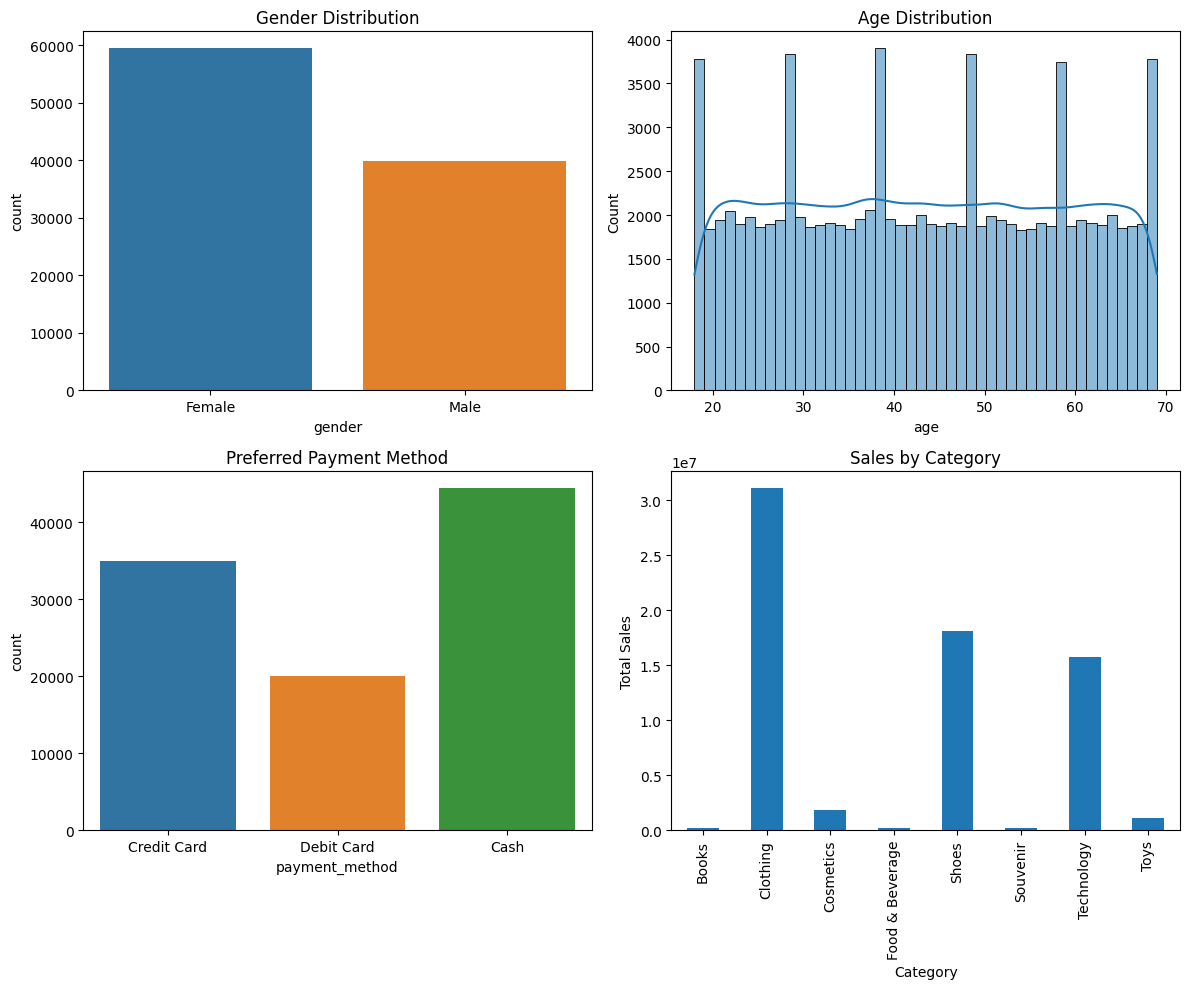

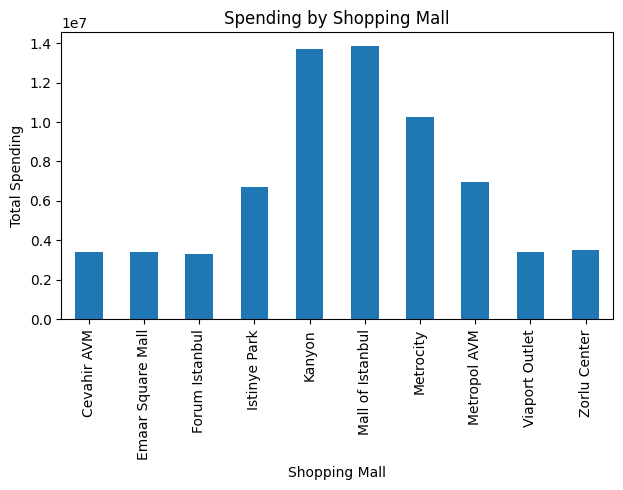

In [18]:
def customer_behavior_analysis(df):
    # Number of unique customers
    num_customers = df['customer_id'].nunique()
    
    # Gender distribution
    gender_distribution = df['gender'].value_counts()
    
    # Age distribution
    age_distribution = df['age'].describe()
    
    # Preferred payment method
    payment_methods = df['payment_method'].value_counts()
    
    # Sales by category
    sales_by_category = df.groupby('category')['price'].sum()
    
    # Average spending per customer
    avg_spending = df.groupby('customer_id')['price'].sum().mean()
    
    # Shopping frequency
    shopping_frequency = df['customer_id'].value_counts().mean()
    
    # Spending by shopping mall
    spending_by_mall = df.groupby('shopping_mall')['price'].sum()
    
    # Results
    results = {
        'num_customers': num_customers,
        'gender_distribution': gender_distribution,
        'age_distribution': age_distribution,
        'payment_methods': payment_methods,
        'sales_by_category': sales_by_category,
        'avg_spending': avg_spending,
        'shopping_frequency': shopping_frequency,
        'spending_by_mall': spending_by_mall
    }
    
    return results

# Analyze the customer behavior
analysis_results = customer_behavior_analysis(df)

# Plotting the results
plt.figure(figsize=(12, 10))

# Gender distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')

# Age distribution
plt.subplot(2, 2, 2)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

# Preferred payment method
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='payment_method')
plt.title('Preferred Payment Method')

# Sales by category
plt.subplot(2, 2, 4)
sales_by_category = analysis_results['sales_by_category']
sales_by_category.plot(kind='bar')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

# Plotting additional results
plt.figure(figsize=(12, 5))

# Spending by shopping mall
plt.subplot(1, 2, 1)
spending_by_mall = analysis_results['spending_by_mall']
spending_by_mall.plot(kind='bar')
plt.title('Spending by Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Spending')



plt.tight_layout()
plt.show()